In [25]:
import pandas as pd
%matplotlib inline
# reading data
colors = pd.read_csv('datasets/colors.csv')
sets = pd.read_csv('datasets/sets.csv')

display(colors.head())
sets.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [26]:
#how many colors & number transluscent
display(colors.name.nunique())

colors_summary = colors.groupby('is_trans').count()
colors_summary

135

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


,year,num_parts
year,,
1950,1950,10.142857
1953,1953,16.500000
1954,1954,12.357143
1955,1955,36.857143
1956,1956,18.500000


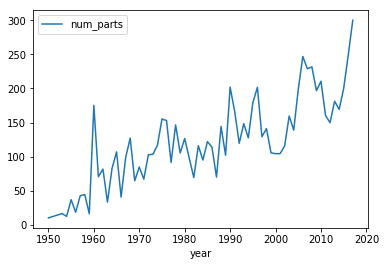

In [27]:
# Parts per year
ppy = {'year':'first','num_parts':'mean'}
parts_by_year = sets[['year','num_parts']].groupby('year').aggregate(ppy)
display(parts_by_year.head())

parts_by_year.plot(x='year',y='num_parts')

,set_num,name,year,theme_id,num_parts
7062,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
7065,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
7081,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
7083,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
7084,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
7085,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
7086,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


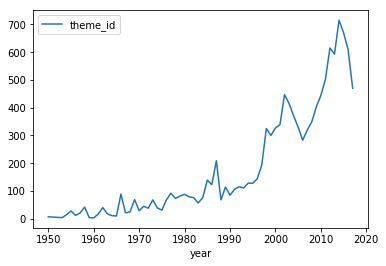

In [28]:
#rate of theme increase
#What was the first theme?

themes=sets[['year','theme_id']]
themes_by_year = themes.groupby(by='year', as_index=False).agg({'theme_id':pd.Series.count})
themes_by_year.plot('year','theme_id')
sets[sets.year==1950]
#suppose it makes sense the first theme was "bricks"